# HW 7-1 - Tim Demetriades
## Principle Component Analysis
4/10/2021

Here we use the 4-factor time series consisting of Market-risk free (M-r), SMB (Small minus big), HML (High minus low), and Momentum.

### Part 1
Perform principal components analysis on the four-factor time series (market-RF, SMB, HML, and Momentum) in HW1.  

How many principal components account for 75% of the covariance matrix trace (i.e., the eigenvalue summations). You can use either Matlab, R, or Python for this PCA decomposition.

#### Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
factors = ['Mkt-RF', 'SMB', 'HML', 'Mom']
df = pd.read_csv('data.csv', usecols=factors)

In [3]:
print(df.shape)
df.head()

(948, 4)


,Mkt-RF,SMB,HML,Mom
0,-0.10,-0.09,4.72,0.36
1,4.32,0.31,3.40,-1.67
2,0.33,-1.77,-2.42,2.97
3,0.42,0.30,1.03,4.53
4,5.36,0.67,3.41,3.41


In [4]:
df.describe()

,Mkt-RF,SMB,HML,Mom
count,948.000000,948.000000,948.000000,948.000000
mean,0.643439,0.246593,0.409821,0.764167
std,5.481649,3.371818,3.610355,4.696955
min,-29.060000,-16.580000,-13.440000,-50.630000
25%,-2.172500,-1.572500,-1.300000,-0.730000
50%,0.965000,0.105000,0.250000,0.950000
75%,3.737500,1.860000,1.780000,2.990000
max,38.270000,38.840000,35.480000,18.400000


#### Standardize Data

In [5]:
standardized_values = StandardScaler().fit_transform(df.values)    # fit to data then transform it

In [6]:
standardized_df = pd.DataFrame(data=standardized_values, columns=factors)
print(standardized_df.shape)
standardized_df.head()

(948, 4)


,Mkt-RF,SMB,HML,Mom
0,-0.135695,-0.099878,1.194468,-0.086094
1,0.671057,0.018815,0.828660,-0.518517
2,-0.057210,-0.598389,-0.784221,0.469878
3,-0.040783,0.015848,0.171869,0.802184
4,0.860882,0.125639,0.831432,0.563606


In [7]:
standardized_df.describe()

,Mkt-RF,SMB,HML,Mom
count,9.480000e+02,9.480000e+02,9.480000e+02,9.480000e+02
mean,-1.857691e-17,-3.416746e-17,-7.019408e-18,-3.004292e-17
std,1.000528e+00,1.000528e+00,1.000528e+00,1.000528e+00
min,-5.421565e+00,-4.992996e+00,-3.838163e+00,-1.094779e+01
25%,-5.139740e-01,-5.397839e-01,-4.738380e-01,-3.182818e-01
50%,5.869235e-02,-4.201519e-02,-4.429067e-02,3.958552e-02
75%,5.647377e-01,4.787503e-01,3.797141e-01,4.741387e-01
max,6.867718e+00,1.145192e+01,9.718903e+00,3.756719e+00


Now after standardizing you can see that the means for each column are all basically 0 and the standard deviations are all basically 1.
#### PCA Decomposition
We want to see how many principle components account for 75% of the covariance matrix, so we will create an instance of the model with the arguement `0.75` so that we get enough principle components to account for at least 75% of the covariance matrix.

In [8]:
# Make an instance of the model
pca = PCA(0.75)    # principal components that account for at least 75% of covariance matrix

In [9]:
# Fit model
principal_components = pca.fit_transform(X=standardized_values)    # fit the model with X and apply the dimensionality reduction on X

In [10]:
print('Eigenvalues:')
pca.explained_variance_

Eigenvalues:


array([1.78823759, 0.99714956, 0.65490974])

In [11]:
print('Eigenvectors:')
pca.components_

Eigenvectors:


array([[ 0.54039306,  0.39954008,  0.48253342, -0.56169793],
       [-0.31502278, -0.70031319,  0.54955068, -0.32911416],
       [-0.6343146 ,  0.56671385,  0.48301441,  0.2077919 ]])

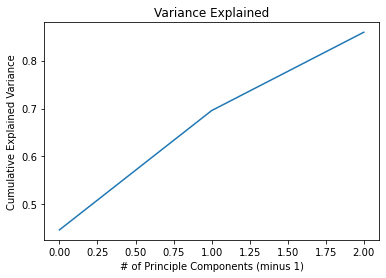

In [12]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Variance Explained')
plt.xlabel('# of Principle Components (minus 1)')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In the above plot we can see that 3 principle components are needed to retain at least 75% of the covariance matrix.

In [13]:
num_components = pca.n_components_
print(f'{num_components} principal components are needed to retain at least 75% of the covariance matrix.')

3 principal components are needed to retain at least 75% of the covariance matrix.


In [14]:
pca.explained_variance_ratio_

array([0.44658782, 0.24902443, 0.16355473])

In [15]:
pc1and2 = pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1]
pc1and2and3 = pc1and2 + pca.explained_variance_ratio_[2]
print(f'Principal components 1 and 2 retain {pc1and2:.2%} of the covariance matrix.')
print(f'Principal components 1, 2, and 3 retain {pc1and2and3:.2%} of the covariance matrix.')

Principal components 1 and 2 retain 69.56% of the covariance matrix.
Principal components 1, 2, and 3 retain 85.92% of the covariance matrix.


From the above, we can see that 3 principle components are needed to retain at least 75% of the covariance matrix. The first 2 principle components only account for 69.56% of the covariance matrix, but when the 3rd principle component is added all 3 combined account for 85.92% of the covariance matrix. 

**Therefore, we were able to reduce this four-factor time series down to 3 principal components while still retaining around 85% of the data.**

Let's create a data frame of the principle components.

In [16]:
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3'])
pca_df.head()

,PC1,PC2,PC3
0,0.511496,0.797448,0.588527
1,1.061258,0.401467,-0.122488
2,-0.912338,-0.148531,-0.583979
3,-0.383360,-0.167810,0.284552
4,0.600030,-0.087761,0.043838


In [17]:
pca_df.describe()

,PC1,PC2,PC3
count,9.480000e+02,9.480000e+02,9.480000e+02
mean,-1.493180e-18,8.197849e-19,-1.178441e-17
std,1.337250e+00,9.985738e-01,8.092649e-01
min,-5.294508e+00,-7.840881e+00,-3.832091e+00
25%,-4.985448e-01,-4.654892e-01,-4.647768e-01
50%,-6.696247e-02,2.633705e-03,-3.619317e-02
75%,3.867090e-01,4.471273e-01,4.018122e-01
max,1.558531e+01,7.924006e+00,5.778978e+00


In [18]:
my_df = pd.DataFrame(pca.components_, columns=factors)
my_df

,Mkt-RF,SMB,HML,Mom
0,0.540393,0.399540,0.482533,-0.561698
1,-0.315023,-0.700313,0.549551,-0.329114
2,-0.634315,0.566714,0.483014,0.207792


The above data frame has the 3 principle components for each row with their corresponding eigenvectors. Each value in each eigen vector maps to a factor.

Let's now find the most important factor of each principle component by figuring out which factors are contributing most to each principle component.

In [19]:
# get the index of the most important factor on EACH component
most_important = [np.abs(pca.components_[i]).argmax() for i in range(num_components)]

# get the most important factor names
most_important_names = [factors[most_important[i]] for i in range(num_components)]
print(most_important_names)

['Mom', 'SMB', 'Mkt-RF']


**From the above, we can see that in the first principal component, Momentum is the most important (and therefore the most important factor). Next is SMB, and third is Mkt-RF.**

### Part 2
Plot the principal components PC1, PC2.  

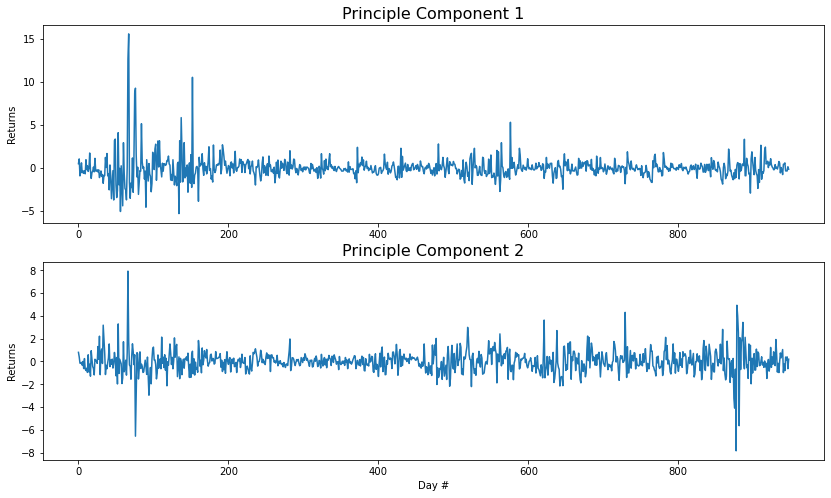

In [20]:
plt.figure(figsize=(14,8))

plt.subplot(2,1,1)
plt.plot(pca_df.PC1)
plt.title('Principle Component 1', fontsize=16)
plt.ylabel('Returns')

plt.subplot(2,1,2)
plt.plot(pca_df.PC2)
plt.title('Principle Component 2', fontsize=16)
plt.xlabel('Day #')
plt.ylabel('Returns')

plt.show()

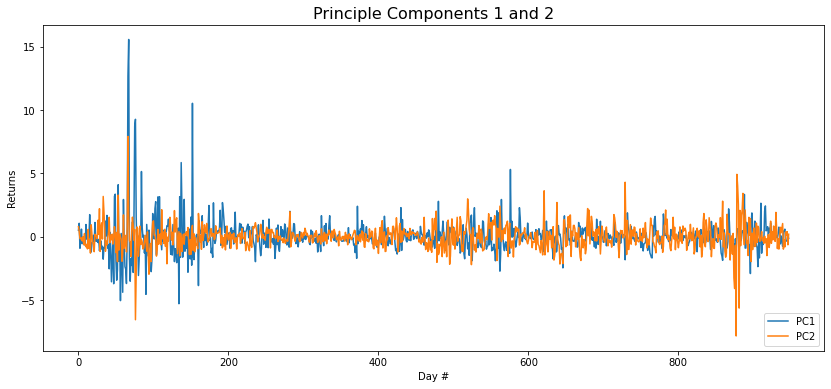

In [21]:
plt.figure(figsize=(14,6))

plt.plot(pca_df.PC1, label='PC1')
plt.title('Principle Components 1 and 2', fontsize=16)
plt.plot(pca_df.PC2, label='PC2')
plt.legend(loc=4)
plt.xlabel('Day #')
plt.ylabel('Returns')

plt.show()